# Software Defect Prediction using SMOTE based Neural Network

## Reproducible

In [1]:
def repro():
  # Seed value
  # Apparently you may use different seed values at each stage
  seed_value= 42

  # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
  import os
  os.environ['PYTHONHASHSEED']=str(seed_value)

  # 2. Set the `python` built-in pseudo-random generator at a fixed value
  import random
  random.seed(seed_value)

  # 3. Set the `numpy` pseudo-random generator at a fixed value
  import numpy as np
  np.random.seed(seed_value)

  # 4. Set the `tensorflow` pseudo-random generator at a fixed value
  import tensorflow as tf
  tf.random.set_seed(seed_value)
  # for later versions: 
  # tf.compat.v1.set_random_seed(seed_value)

  # 5. Configure a new global `tensorflow` session
  from keras import backend as K
  # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
  # K.set_session(sess)
  # for later versions:
  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
repro()

Using TensorFlow backend.


In [2]:
repro()

## Import

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix    #Confussion Matrix
from sklearn import metrics                     #Evaluation Measurment\
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential       
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
import keras
# from tensorflow.keras import optimizers

import math

from scipy.stats import uniform

import matplotlib.pyplot as plt                 #Visualisasi

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

modelrf=RandomForestClassifier(random_state=42)
modelnb = GaussianNB()
modellogreg = LogisticRegression()
modeldt = DecisionTreeClassifier()
modelsvm = SVC()

import tensorflow as tf

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from IPython.display import display


## Load Dataset

,Dataset,Data,Feature
0,CM1,498,22
1,JM1,10880,22
2,MW1,253,38
3,KC1,2109,22
4,KC2,522,22
5,PC1,1109,22
6,PC2,745,37
7,PC3,1077,38
8,PC4,1458,38


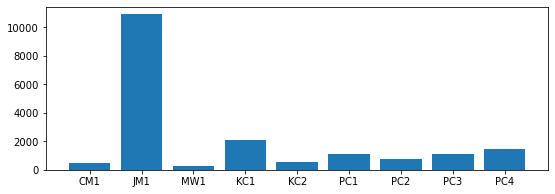

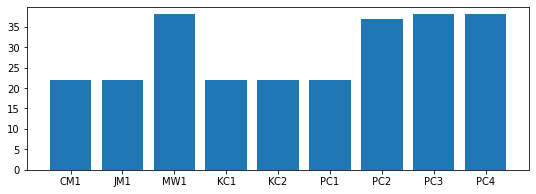

In [4]:
repro()
#Import CM1 Dataset
data_cm1 = pd.read_csv('Dataset/clean/CM1.csv')

#import + Preprocess JM1 Dataset
data_jm1 = pd.read_csv('Dataset/clean/JM1.csv')
indexNames = data_jm1[ data_jm1['branchCount'] == '?' ].index
data_jm1.drop(indexNames , inplace=True)

#import MW1 Dataset
data_mw1 = pd.read_csv('Dataset/clean/MW1.csv')

#import KC1 Dataset
data_kc1 = pd.read_csv('Dataset/clean/KC1.csv')

#import KC2 Dataset ------------------
data_kc2 = pd.read_csv('Dataset/clean/KC2.csv')

#import PC1 Dataset
data_pc1 = pd.read_csv('Dataset/clean/PC1.csv')

#import PC2 Dataset -------------
data_pc2 = pd.read_csv('Dataset/clean/PC2.csv')

#import PC3 Dataset ----------------
data_pc3 = pd.read_csv('Dataset/clean/PC3.csv')

#import PC4 Dataset
data_pc4 = pd.read_csv('Dataset/clean/PC4.csv')


#Visualisasi Jumlah Data
names = ['CM1', 'JM1', 'MW1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC3', 'PC4']
values_data = [data_cm1.shape[0], data_jm1.shape[0], data_mw1.shape[0],data_kc1.shape[0],data_kc2.shape[0],
          data_pc1.shape[0],data_pc2.shape[0],data_pc3.shape[0],data_pc4.shape[0]]
plt.figure(figsize=(9, 3))
plt.bar(names, values_data)

#Visualisasi Jumlah Fitur
values_feature = [data_cm1.shape[1], data_jm1.shape[1], data_mw1.shape[1],data_kc1.shape[1],data_kc2.shape[1],
          data_pc1.shape[1],data_pc2.shape[1],data_pc3.shape[1],data_pc4.shape[1]]
plt.figure(figsize=(9, 3))
plt.bar(names, values_feature)

# data_pc4.iloc[:, data_pc4.columns != 'c'] = scaler.fit_transform(data_pc4.iloc[:, data_pc4.columns != 'c'])
# data_pc3.iloc[:, data_pc3.columns != 'Defective'] = scaler.fit_transform(data_pc3.iloc[:, data_pc3.columns != 'Defective'])

Dataset = {'Dataset': ['CM1', 'JM1', 'MW1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC3', 'PC4'],
           'Data': [data_cm1.shape[0], data_jm1.shape[0], data_mw1.shape[0],data_kc1.shape[0],data_kc2.shape[0],
                    data_pc1.shape[0],data_pc2.shape[0],data_pc3.shape[0],data_pc4.shape[0]],
           'Feature': [data_cm1.shape[1], data_jm1.shape[1], data_mw1.shape[1],data_kc1.shape[1],data_kc2.shape[1],
                       data_pc1.shape[1],data_pc2.shape[1],data_pc3.shape[1],data_pc4.shape[1]]
        }

df = pd.DataFrame(Dataset, columns = ['Dataset', 'Data','Feature'])
df

## Min-Max Scaller

In [5]:
repro()
scaler = MinMaxScaler()

data_cm1.iloc[:, data_cm1.columns != 'class'] = scaler.fit_transform(data_cm1.iloc[:, data_cm1.columns != 'class'])
data_jm1.iloc[:, data_jm1.columns != 'defects'] = scaler.fit_transform(data_jm1.iloc[:, data_jm1.columns != 'defects'])
data_kc1.iloc[:, data_kc1.columns != 'class'] = scaler.fit_transform(data_kc1.iloc[:, data_kc1.columns != 'class'])
data_kc2.iloc[:, data_kc2.columns != 'class'] = scaler.fit_transform(data_kc2.iloc[:, data_kc2.columns != 'class'])
data_pc1.iloc[:, data_pc1.columns != 'class'] = scaler.fit_transform(data_pc1.iloc[:, data_pc1.columns != 'class'])
data_pc2.iloc[:, data_pc2.columns != 'Defective'] = scaler.fit_transform(data_pc2.iloc[:, data_pc2.columns != 'Defective'])
data_pc3.iloc[:, data_pc3.columns != 'Defective'] = scaler.fit_transform(data_pc3.iloc[:, data_pc3.columns != 'Defective'])
data_pc4.iloc[:, data_pc4.columns != 'c'] = scaler.fit_transform(data_pc4.iloc[:, data_pc4.columns != 'c'])

## Evaluation Metric

In [6]:
def bal(y_true, Y_pred):
    repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    pf = fp/(fp+tn)
    bal = 1 - ((math.sqrt((1-recall(y_true, Y_pred))**2+ pf**2))/(math.sqrt(2)))
    return bal

def auc(y_true, Y_pred):
    repro()
    # fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred, pos_label=True)
    auc = metrics.roc_auc_score(y_true, Y_pred)
    return auc

def gmeans(y_true, Y_pred):
    # repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    pf = fp/(fp+tn)
    pd = tp/(tp+fn)
    gmeans = math.sqrt(pd*(1-pf))
    return gmeans

def pf(y_true, Y_pred):
    repro()
    tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
    # print(tn)
    pf = fp/(fp+tn)
    return pf

def recall(y_true, Y_pred):
  repro()
  tn, fp, fn, tp = confusion_matrix(y_true, Y_pred, labels=[0,1]).ravel()
  pd = tp/(tp+fn)
  return pd

## Neural Network

In [44]:
def search_NN(data, 
              y_name, 
              fold,
              epoch = 25,
              batch_size = 64,
              smote = True):
  
  def model_keras(lr = 0.01, neurons = 50, drop = 0.2,layer = 3):
    dim = len(data.iloc[:, data.columns != y_name ].columns)
    opt = optimizers.Adam(learning_rate=lr)
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim = dim, kernel_initializer=keras.initializers.glorot_uniform(seed=42)))
    model.add(Dropout(drop))
    for x in range(layer - 1):
        model.add(Dense(neurons, activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=42)));
        model.add(Dropout(drop))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

  X = data.iloc[:, data.columns != y_name ]
  y = data[y_name]

  # dim = len(data.columns)

  kfold_inner = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
  kfold_outer = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
  sm = SMOTE(random_state=42)

  model = KerasClassifier(build_fn=model_keras, epochs=epoch, batch_size=batch_size, verbose=0)
  

  '''
    Hyperparameter yang akan dioptimasi
    Neural Network : learning Rate (lr), neurons, layer, drop
    SMOTE : Neighbors, sampling_strategy
  '''

  scoring = {'recall': metrics.make_scorer(recall), 
             'bal': metrics.make_scorer(bal), 
             'auc':metrics.make_scorer(metrics.roc_auc_score), 
             'gmeans':metrics.make_scorer(gmeans)}

  if (smote == True):
    pipeline = Pipeline([('sm', sm), ('clfs', model)])
    distributions = dict(
                      clfs__lr = [0.001 , 0.0012, 0.0014, 0.0016, 0.0018, 0.002 , 0.0022, 0.0024,
                                  0.0026, 0.0028, 0.003 , 0.0032, 0.0034, 0.0036, 0.0038, 0.004 ,
                                  0.0042, 0.0044, 0.0046, 0.0048, 0.005 , 0.0052, 0.0054, 0.0056,
                                  0.0058, 0.006 , 0.0062, 0.0064, 0.0066, 0.0068, 0.007 , 0.0072,
                                  0.0074, 0.0076, 0.0078, 0.008 , 0.0082, 0.0084, 0.0086, 0.0088,
                                  0.009 , 0.0092, 0.0094, 0.0096, 0.0098],
                      clfs__neurons= [25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57,
                                      59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91,
                                      93, 95, 97, 99],
                      clfs__layer= [1, 2, 3, 4],
                      clfs__drop= [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55],
                      sm__k_neighbors = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
                      sm__sampling_strategy = [0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
                                                0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
  else:
    pipeline = Pipeline([('clfs', model)])
    distributions = dict(
                      clfs__lr = [0.001 , 0.0012, 0.0014, 0.0016, 0.0018, 0.002 , 0.0022, 0.0024,
                                  0.0026, 0.0028, 0.003 , 0.0032, 0.0034, 0.0036, 0.0038, 0.004 ,
                                  0.0042, 0.0044, 0.0046, 0.0048, 0.005 , 0.0052, 0.0054, 0.0056,
                                  0.0058, 0.006 , 0.0062, 0.0064, 0.0066, 0.0068, 0.007 , 0.0072,
                                  0.0074, 0.0076, 0.0078, 0.008 , 0.0082, 0.0084, 0.0086, 0.0088,
                                  0.009 , 0.0092, 0.0094, 0.0096, 0.0098],
                      clfs__neurons= [25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57,
                                      59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91,
                                      93, 95, 97, 99],
                      clfs__layer= [1, 2, 3, 4],
                      clfs__drop= [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55])
    
  clf = RandomizedSearchCV(pipeline, distributions, random_state=42, cv=kfold_inner, scoring = scoring, refit = 'bal', n_jobs = -1, n_iter=50, verbose = 1)
  # nested_score = cross_val_score(clf, X=X, y=y, cv=kfold_outer)
  result = cross_validate(clf, X=X, y=y, cv=kfold_outer, scoring=scoring)
  print('bal: ', result['test_bal'].mean())
  print('recall: ', result['test_recall'].mean())
  print('auc: ', result['test_auc'].mean())
  print('gmeans: ', result['test_gmeans'].mean())

### KC2

In [12]:
repro()
search_kc2 = search_NN(data_kc2, 'class', 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.9min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


bal:  0.754198067673243
recall:  0.7385281385281385
auc:  0.7716737078182861
gmeans:  0.7660305269104531


In [15]:
repro()
search_kc2 = search_NN(data_kc2, 'class', 5, smote = False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.2min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.0min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.1min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 319.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 320.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 321.4min finished


bal:  0.6186221083385607
recall:  0.4662337662337662
auc:  0.6981771240807385
gmeans:  0.6557793990641352


### KC1

In [16]:
repro()
search_kc1 = search_NN(data_kc1, 'class', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.9min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.1min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.0min finished


bal:  0.7053587718679937
recall:  0.7362237762237761
auc:  0.7085227715663935
gmeans:  0.7071407920344475


In [17]:
repro()
search_kc1 = search_NN(data_kc1, 'class', 5, smote=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.2min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.1min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.3min finished


bal:  0.4227649821574329
recall:  0.1839160839160839
auc:  0.5829826540500698
gmeans:  0.42217201762982376


### PC1

In [18]:
repro()
search_pc1 = search_NN(data_pc1, 'class'
                       , 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.3min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.4min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.3min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.6min finished


bal:  0.7147920626898701
recall:  0.7025
auc:  0.734475458468177
gmeans:  0.7252909055837262


In [19]:
repro()
search_pc1 = search_NN(data_pc1, 'class', 5, smote=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.2min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.0min finished


bal:  0.4317471248357726
recall:  0.19666666666666668
auc:  0.5891264481028096
gmeans:  0.4315626944489538


### PC2

In [21]:
repro()
search_pc2 = search_NN(data_pc2, 'Defective', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.0min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.1min finished


bal:  0.5370146545628562
recall:  0.36666666666666664
auc:  0.6030782553928515
gmeans:  0.5524603345896522


In [22]:
repro()
search_pc2 = search_NN(data_pc2, 'Defective', 5, smote=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.9min finished


bal:  0.29289321881345254
recall:  0.0
auc:  0.5
gmeans:  0.0


### PC3

In [23]:
repro()
search_pc3 = search_NN(data_pc3, 'Defective', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.6min finished


bal:  0.766904211631598
recall:  0.7977207977207976
auc:  0.7705732211051359
gmeans:  0.769521216516833


In [24]:
repro()
search_pc3 = search_NN(data_pc3, 'Defective', 5, smote=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.6min finished


bal:  0.41813456264739834
recall:  0.17834757834757836
auc:  0.5721947280457919
gmeans:  0.4018127263522472


### PC4

In [25]:
repro()
search_pc4 = search_NN(data_pc4, 'c', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.3min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.3min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.9min finished


bal:  0.808600457044966
recall:  0.78
auc:  0.8208593750000001
gmeans:  0.8164904187418731


In [26]:
repro()
search_pc4 = search_NN(data_pc4, 'c', 5, smote=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.3min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.5min finished


bal:  0.6130976246408557
recall:  0.45460317460317456
auc:  0.7155828373015873
gmeans:  0.6589181194501357


### JM1

In [29]:
repro()
search_pc4 = search_NN(data_jm1, 'defects', 5, smote=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 14.4min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 11.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 11.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 11.8min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 11.9min finished


bal:  0.6402985801295518
recall:  0.5757708404026693
auc:  0.6529231581320112
gmeans:  0.6456652666636022


In [30]:
repro()
search_pc4 = search_NN(data_jm1, 'defects', 5, smote=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  9.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  9.6min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 10.5min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 10.3min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 11.2min finished


bal:  0.3573839492652331
recall:  0.09131433095803641
auc:  0.5390491013083117
gmeans:  0.2984433121844966
